# Tiny study of births per month
[Source file](http://www.gks.ru/bgd/regl/B09_16/IssWWW.exe/Stg/02-04.htm)


In [1]:
%matplotlib inline
import requests
import lxml.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = 'http://www.gks.ru/bgd/regl/B09_16/IssWWW.exe/Stg/02-04.htm'

# read page
page= lxml.html.parse(url)

In [2]:
# get table
table = page.getroot().body.xpath('table')[0]

# cleanup
births_month = []
for elem in table:
    births_month.append(elem.text_content().split('\r\n'))

# scplit to data and index lists
# years will be index
years = births_month[0]
births_month = births_month[3:-1]
years = years[1::2]
years[0] = 'Month'
# populate data array
data = []
for elem in births_month:
    line = elem[1::2]
    month = [line[0].split('/')[1].strip()]
    numbers = [int(e) for e in line[1:]]
    data.append(month + numbers)
# construct DataFrame
df = pd.DataFrame(data=data, columns = years)
df = df.set_index('Month')
df


,1990,1995,2000,2005,2006,2007,2008
Month,,,,,,,
January,179784,123380,111541,129722,126022,132915,146279
February,161184,109511,100151,113672,111414,115467,131330
March,175827,122623,109119,126911,125085,129787,136420
April,168284,116552,103332,118745,117737,122930,135064
May,175922,120686,108432,121149,120913,131993,135771
June,174354,116894,109807,124022,128895,132837,142321
July,174833,118792,111541,130757,132073,146093,158288
August,167628,116221,109563,127219,134166,147031,154247
September,153968,108297,104566,122036,127333,140116,150027


In [3]:
# Percentage calculation
df_perc = df.apply(func=lambda x: 100*x/float(x.sum()))
df_perc

,1990,1995,2000,2005,2006,2007,2008
Month,,,,,,,
January,9.039728,9.047524,8.805018,8.901127,8.517158,8.255031,8.534673
February,8.104500,8.030503,7.905894,7.799825,7.529881,7.171378,7.662471
March,8.840765,8.992013,8.613826,8.708245,8.453831,8.060759,7.959448
April,8.461496,8.546823,8.157002,8.147919,7.957219,7.634887,7.880332
May,8.845542,8.849972,8.559594,8.312874,8.171868,8.197768,7.921582
June,8.766701,8.571902,8.668137,8.510011,8.711329,8.250187,8.303743
July,8.790786,8.711083,8.805018,8.972146,8.926113,9.073485,9.235340
August,8.428511,8.522551,8.648875,8.729379,9.067568,9.131742,8.999567
September,7.741672,7.941479,8.254413,8.373737,8.605762,8.702268,8.753350


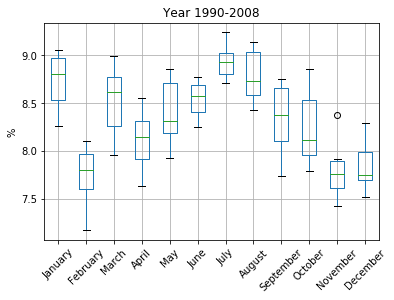

In [4]:
# Draw percentage
p = df_perc.T.boxplot(figsize=(10,6))
p.set_xticklabels(p.xaxis.get_majorticklabels(), rotation=45)
p.set_ylabel('%')
p.set_title('Year 1990-2008')

# Another source

In [5]:
df2 = pd.read_excel('http://demoscope.ru/weekly/ssp/rus_mon_bir.xls', index_col=1, header=5)

In [6]:
df2 = df2.drop(df2.columns[0],axis=1)
df2 = df2.drop(['month not stated', 'Total'], axis = 1)
df2 = df2.iloc[0:47]
df2 = df2.T
df2

,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
January,294461.0,290178.0,294554.0,289736.0,280955.0,265111.0,249768.0,234133.0,213661.0,189538.0,...,124373.0,123473.0,123380.0,113171.0,115625.0,111752.0,109603.0,111541.0,113995.0,123209.0
February,241272.0,229414.0,232751.0,230352.0,238607.0,217249.0,204527.0,194746.0,184027.0,163187.0,...,110805.0,112083.0,109511.0,104228.0,100158.0,102392.0,99798.0,100151.0,100710.0,104581.0
March,252344.0,258313.0,251086.0,252283.0,258328.0,242617.0,226143.0,215102.0,198818.0,183332.0,...,123734.0,126858.0,122623.0,112849.0,110438.0,112125.0,106860.0,109119.0,112463.0,117037.0
April,239466.0,241065.0,238452.0,239995.0,238177.0,228813.0,216624.0,203642.0,186166.0,173506.0,...,119464.0,121018.0,116552.0,112859.0,106841.0,111873.0,104833.0,103332.0,107953.0,113353.0
May,233260.0,236346.0,239615.0,234549.0,237652.0,229030.0,217543.0,202722.0,184834.0,173397.0,...,121571.0,122555.0,120686.0,115900.0,109996.0,110903.0,103795.0,108432.0,110648.0,114797.0
June,217554.0,213227.0,212919.0,219438.0,218852.0,211090.0,202436.0,190353.0,171076.0,162538.0,...,118019.0,122787.0,116894.0,111083.0,108857.0,112235.0,108167.0,109807.0,113318.0,120107.0
July,226033.0,230459.0,210507.0,232241.0,229043.0,218625.0,210143.0,195514.0,175174.0,164817.0,...,120409.0,124084.0,118792.0,115665.0,113077.0,115783.0,108539.0,111541.0,118401.0,128125.0
August,223690.0,234806.0,219301.0,234885.0,227627.0,220239.0,204272.0,191270.0,169877.0,164731.0,...,115425.0,120990.0,116221.0,109141.0,106843.0,109205.0,102398.0,109563.0,114609.0,122035.0
September,210348.0,227178.0,232002.0,222062.0,219014.0,211123.0,189379.0,178056.0,161958.0,156501.0,...,109629.0,113858.0,108297.0,100938.0,97509.0,104016.0,96133.0,104566.0,106212.0,116667.0
October,218330.0,240303.0,241332.0,222876.0,222339.0,217488.0,189140.0,180745.0,164083.0,158592.0,...,108202.0,110409.0,106982.0,104256.0,97387.0,102268.0,93426.0,102745.0,108082.0,116186.0


In [7]:
df2_perc =  df2.apply(func=lambda x: 100*x/float(x.sum()))
df2_perc

,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
January,10.632971,10.247853,10.448112,10.361673,10.097748,9.958586,10.060990,10.042140,10.068879,9.522034,...,9.019373,8.768617,9.047524,8.674992,9.177425,8.708385,9.023408,8.805018,8.691333,8.819946
February,8.712319,8.101927,8.255900,8.237955,8.575727,8.160706,8.238622,8.352802,8.672362,8.198210,...,8.035438,7.959739,8.030503,7.989477,7.949773,7.978997,8.216180,7.905894,7.678443,7.486456
March,9.112129,9.122517,8.906260,9.022261,9.284516,9.113625,9.109343,9.225886,9.369395,9.210257,...,8.973033,9.009008,8.992013,8.650310,8.765721,8.737451,8.797582,8.613826,8.574528,8.378122
April,8.647105,8.513391,8.458120,8.582812,8.560273,8.595094,8.725905,8.734358,8.773163,8.716617,...,8.663378,8.594272,8.546823,8.651076,8.480218,8.717814,8.630702,8.157002,8.230672,8.114402
May,8.423006,8.346736,8.499373,8.388050,8.541404,8.603245,8.762924,8.694899,8.710392,8.711141,...,8.816175,8.703424,8.849972,8.884181,8.730638,8.642225,8.545246,8.559594,8.436147,8.217771
June,7.855864,7.530271,7.552440,7.847643,7.865717,7.929350,8.154394,8.164383,8.062040,8.165605,...,8.558589,8.719900,8.571902,8.514939,8.640233,8.746023,8.905184,8.668137,8.639716,8.597889
July,8.162040,8.138832,7.466884,8.305510,8.231989,8.212393,8.464842,8.385742,8.255160,8.280098,...,8.731908,8.812008,8.711083,8.866167,8.975184,9.022504,8.935810,8.805018,9.027260,9.171859
August,8.077434,8.292349,7.778816,8.400066,8.181097,8.273021,8.228350,8.203714,8.005536,8.275777,...,8.370475,8.592283,8.522551,8.366077,8.480377,8.509907,8.430234,8.648875,8.738146,8.735905
September,7.595655,8.022961,8.229332,7.941484,7.871539,7.930590,7.628440,7.636956,7.632350,7.862317,...,7.950156,8.085794,7.941479,7.737286,7.739516,8.105549,7.914448,8.254413,8.097933,8.351635
October,7.883885,8.486480,8.560277,7.970595,7.991042,8.169683,7.618813,7.752289,7.732491,7.967365,...,7.846672,7.840858,7.845050,7.991623,7.729832,7.969335,7.691586,8.110664,8.240507,8.317203


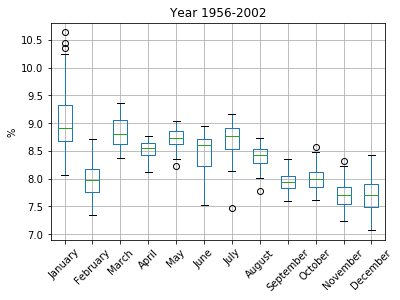

In [8]:
p = df2_perc.T.boxplot(figsize=(30,12))
p.set_xticklabels(p.xaxis.get_majorticklabels(), rotation=45)
p.set_ylabel('%')
p.set_title('Year 1956-2002')

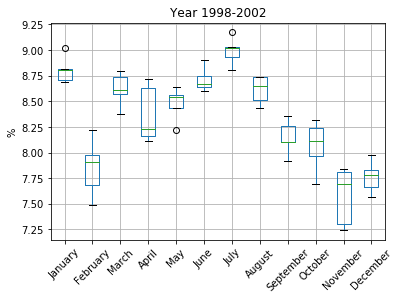

In [9]:
p = df2_perc[[1998,1999,2000,2001,2002]].T.boxplot(figsize=(30,12))
p.set_xticklabels(p.xaxis.get_majorticklabels(), rotation=45)
p.set_ylabel('%')
p.set_title('Year 1998-2002')